CPU times: user 1.37 s, sys: 299 ms, total: 1.67 s
Wall time: 2.17 s


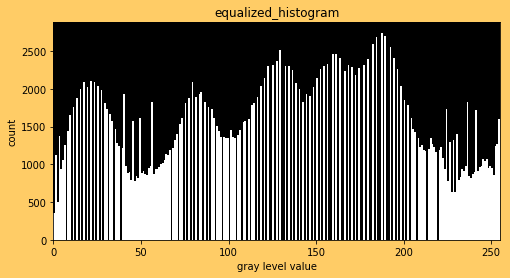

In [1]:
%%time
import numpy as np
import cv2
%matplotlib inline
import matplotlib.pyplot as plt

#用灰階讀檔
original = cv2.imread("lena.bmp", 0)

#用來count original裡面的灰階值的，用來畫histogram，nj的意思
count = np.zeros(256, np.int)

#填好count
for i in range (512):
    for j in range (512):
        count[original[i,j]] += 1

#histogram equalization
#先new一個空numpy array來接收equalization後的圖，cv2的image可以直接接收numpy array
#算一下equlized後的s陣列，還有總pixels數numberofpixels

#計算s用相關參數
equalized_histogram = np.zeros([512,512], int)
rows, columns = original.shape
numberofpixels = rows * columns
s = np.zeros(256)
summationnow = 0
denominator = 255 / float(numberofpixels)

#計算s
for i in range (256):
    summationnow += count[i]
    s[i] = summationnow * denominator

#把s轉進二階矩陣以便輸出equalized後之lena
for i in range (512):
    for j in range (512):
        equalized_histogram[i, j] = int(round(s[original[i,j]]))

#儲存equalized_lena.jpg
cv2.imwrite("equalized_lena.jpg", equalized_histogram)

#作equalized_histogram的圖     
x = np.linspace(0,255,256, endpoint = True, dtype=np.int)
ax = plt.figure(figsize=(8,4))
ax.set_facecolor((1, 0.8, 0.4)) 
plt.axes(facecolor='k')
plt.hist(equalized_histogram.flatten(), bins = x, density=False, color='w')
plt.xlabel("gray level value")
plt.ylabel("count")
plt.title("equalized_histogram")
plt.xlim(0, 255)
#plt.ylim(0, max(count))

#儲存equalized_histogram的圖  
ax.savefig("equalized_histogram.jpg",facecolor=ax.get_facecolor(), edgecolor='none')


In [5]:
#!jupyter nbconvert --to=python cvhw3.ipynb

[NbConvertApp] Converting notebook cvhw3.ipynb to python
[NbConvertApp] Writing 1869 bytes to cvhw3.py
